<a href="https://colab.research.google.com/github/fi-co/py-CL-final-project/blob/main/BERTtopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link to BERTopic original article](https://arxiv.org/pdf/2203.05794.pdf)

# Main

## Initialize model and clustering

In [ ]:
pip install bertopic

(the only file needed is always arxiv_papers.csv)

In [2]:
import pandas as pd

# Load the original dataset
data = pd.read_csv('arxiv_papers.csv')

# Create a new DataFrame with essential columns
essential_columns = ['title', 'abstract', 'published']

# Add a new column 'unique_ID' with ad-hoc unique identifiers
data['unique_ID'] = range(1, len(data) + 1)

# Reorder columns for the new DataFrame
essential_data = data[['unique_ID'] + essential_columns]

# Save the DataFrame to a new CSV file
essential_data.to_csv('modified_df.csv', index=False)


In [4]:
import pandas as pd #non necessary
import numpy as np
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import hashlib  # Import hashlib for generating unique IDs

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Load your modified dataset
# Make sure you have a column named 'abstract' in your dataset containing the abstracts
# Replace 'modified_df.csv' with the actual path to your modified dataset
data = pd.read_csv('modified_df.csv')

# Set the number of abstracts to use
num_abstracts = 2000
data_subset = data.head(num_abstracts)

#Define a function to get unique IDs for each abstract
def generate_unique_id(title, published):
    #combine title and puslished date to create a unique string
    unique_string = f"{title}{published}"
    #Use hashlib to create unique
    unique_id = hashlib.sha256(unique_string.encode()).hexdigest()[:10]
    return unique_id

# Preprocess the data
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
    words = word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_text)

def stem_text(text):
    ps = PorterStemmer()
    words = word_tokenize(text)
    stemmed_text = [ps.stem(word) for word in words]
    return ' '.join(stemmed_text)

data_subset['abstract'] = data_subset['abstract'].str.lower()
data_subset['abstract'] = data_subset['abstract'].apply(clean_text)
data_subset['abstract'] = data_subset['abstract'].apply(remove_stopwords)
data_subset['abstract'] = data_subset['abstract'].apply(stem_text)

# Create a CountVectorizer to get word frequencies
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data_subset['abstract'])

# Initialize BERTopic
bertopic = BERTopic()
topics, _ = bertopic.fit_transform(data_subset['abstract'])

# Obtain document vectors
document_vectors = bertopic.umap_model.embedding_

# Generate unique IDs for each document
data_subset['unique_ID'] = data_subset.apply(lambda row: generate_unique_id(row['title'], row['published']), axis=1)


# Save document vectors, clustering results, and document IDs to a new CSV file
result_df = pd.DataFrame({
    'Document_ID': data_subset['unique_ID'],
    'Topic': topics,
    'Abstract': data_subset['abstract'],
    'Vectors': document_vectors.tolist()
})
result_df.to_csv('clustering_results.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

BERTopic leverages a class-based variation of TF-IDF.
Term Frequency - Inverse Document Frequency is a measure of originality of a word by comparing the number of times a word appears in a doc with the number of docs the word appears in

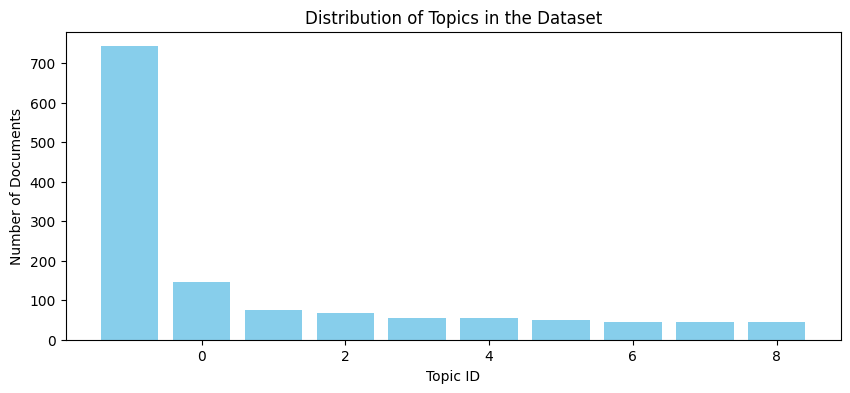

In [5]:
import matplotlib.pyplot as plt

# Visualize the distribution of topics
topic_counts = bertopic.get_topic_freq().sort_values(by='Count', ascending=False).head(10)
plt.figure(figsize=(10, 4))
plt.bar(topic_counts['Topic'], topic_counts['Count'], color='skyblue')
plt.xlabel('Topic ID')
plt.ylabel('Number of Documents')
plt.title('Distribution of Topics in the Dataset')
plt.show()

In [6]:
print("Topic Distribution:")
print(topic_counts)

Topic Distribution:
    Topic  Count
0      -1    743
1       0    145
24      1     76
21      2     68
22      3     56
5       4     54
37      5     49
12      6     46
33      7     45
7       8     44


In [7]:
# Inspect words for each topic
for topic_id in bertopic.get_topics():
    words = [word for word, _ in bertopic.get_topic(topic_id)]
    print(f"\nTop words for Topic {topic_id}: {', '.join(words)}")


Top words for Topic -1: model, design, use, learn, method, propos, data, imag, perform, network

Top words for Topic 0: channel, wireless, propos, commun, network, design, receiv, antenna, rate, transmiss

Top words for Topic 1: graph, node, gnn, network, algorithm, cluster, model, problem, structur, edg

Top words for Topic 2: structur, materi, surfac, lattic, properti, design, colloid, molecular, microstructur, elast

Top words for Topic 3: quantum, qubit, state, gate, comput, algorithm, circuit, simul, protocol, classic

Top words for Topic 4: robot, grasp, control, object, manipul, soft, environ, motion, contact, forc

Top words for Topic 5: comput, cloud, secur, memori, dram, data, execut, schedul, hardwar, design

Top words for Topic 6: flow, heat, equat, control, wind, fluid, scheme, temperatur, exchang, model

Top words for Topic 7: treatment, patient, clinic, trial, covid, data, estim, healthcar, infect, outcom

Top words for Topic 8: ai, research, intellig, design, ethic, hu

## Visual

In [8]:
#Barchart for  Topic Word Scores
bertopic.visualize_barchart(width=280, height=330, top_n_topics=9, n_words=10)

heatmap

In [9]:
bertopic.visualize_heatmap()

2D topic map:

In [ ]:
bertopic.visualize_documents (data_subset['abstract'])

## Investigating 'topic -1' (outlier)


- Retrieve a sample of documents from topic -1.
- Print and inspect the actual text content of these documents.
- Look for patterns or commonalities that might explain why they are not easily assigned to specific topics.

In [13]:
import pandas as pd

# Load the clustering results file
# Replace 'clustering_results_with_vectors_and_ids.csv' with the actual path to your file
clustering_results = pd.read_csv('clustering_results.csv')

# Select abstracts belonging to topic -1
topic_minus1_abstracts = clustering_results[clustering_results['Topic'] == -1]['Document_ID']

# Sample 10 random abstracts
sample_abstracts = topic_minus1_abstracts.sample(10)

# Create a new DataFrame with the sampled abstracts
sampled_abstracts_df = clustering_results[clustering_results['Document_ID'].isin(sample_abstracts)]

# Save the sampled abstracts to a new CSV file
sampled_abstracts_df.to_csv('sampled_abstracts.csv', index=False)

# Display the first few rows of the sampled abstracts DataFrame
print(sampled_abstracts_df[['Document_ID', 'Topic', 'Abstract']])


     Document_ID  Topic                                           Abstract
45    65576da3ed     -1  report design implement proton radiographi sit...
59    ea78cdb95a     -1  exist anchorbas orient object detect method ac...
195   9d71184f4a     -1  current stateoftheart research tackl problem m...
335   06abb25df6     -1  current seismic design code primarili reli str...
458   15af5be043     -1  fierc debat nonlinear embed propag gcn appropr...
834   8b0a0a944d     -1  global integr circuit ic suppli chain hardwar ...
1460  be296e87ac     -1  investig problem minim excess gener error resp...
1569  b4a6399165     -1  author recent paper phi rev c ref gaspard jm s...
1573  f130b41f0f     -1  feder learn fl enabl multipl particip pt build...
1835  f77c909ef6     -1  logic synthesi challeng widelyresearch combina...


### Let's try to restrict topic modelling to topic -1:
- use clustering_results.csv to retrieve abstracts from topic -1 and perform new clustering;
-

1. load data from clustering_results.csv
2. select only outlier topic
3. reapply clustering on it


In [26]:
import pandas as pd
from bertopic import BERTopic

# Load data
data = pd.read_csv('clustering_results.csv')  # Assuming this is the correct file name

# Select only outliers
topic_minus1_outliers = data[data['Topic'] == -1]

# Extract abstracts
outliers_abstracts = topic_minus1_outliers['Abstract'].tolist()

# Apply clustering on Topic -1 using abstracts
bertopic_outliers = BERTopic()
outliers_topics, _ = bertopic_outliers.fit_transform(outliers_abstracts)


Analyzing the top words for each topic in the outlier inspection results can provide insights into the coherence and potential patterns within the topics. Here we inpsect top 10 words for each topic revelead by the latest clustering.

In [27]:
# Inspect words for each topic
for topic_id in bertopic_outliers.get_topics():
    words = [word for word, _ in bertopic_outliers.get_topic(topic_id)]
    print(f"\nTop words for Topic {topic_id}: {', '.join(words)}")


Top words for Topic -1: model, design, use, data, learn, method, propos, algorithm, gener, problem

Top words for Topic 0: imag, method, featur, propos, object, network, model, train, perform, use

Top words for Topic 1: measur, design, optic, use, materi, electron, energi, laser, field, coupl

Top words for Topic 2: attack, design, data, use, evalu, provid, develop, system, perform, result

Top words for Topic 3: algorithm, agent, problem, learn, model, polici, optim, design, delay, time

Top words for Topic 4: network, model, neural, design, comput, deep, learn, propos, use, architectur

Top words for Topic 5: gradient, algorithm, function, learn, chain, method, use, polici, design, neural

Top words for Topic 6: design, method, capacit, acceleromet, develop, sensor, model, experi, die, reduct

Top words for Topic 7: control, stabil, trajectori, model, power, wing, dynam, optim, em, transmiss

Top words for Topic 8: gpu, effici, comput, hardwar, implement, acceler, learn, graph, mem

- Topic O: appears related to image procssing, featuring methods, network models and performance.
- Topic 1: Suggests a focus on designing systems, evaluating approaches, and addressing data-related issues, possibly in the context of security.
- Topic 2: indicate a focus on measurement, laser optics, detectors and spatial aspects
- Topic 3: appear to revolve around algorithmic problems and reinforcement learning
- Topic 4: relates to neural netwrok models, computational architecture, and possibly mobile applications
- Topic 5: focus on materials, electronics, and relate fields
- Topic 6: suggest focus on learning metods
- Topic 7: appears to tackle processors and hardware efficiency, also implementations
- Topic 8: suggests topics relate to control systems, stability, power, optimization and transmission

(they might be misaligned, the order of the topic change each time, what count is the composition, that must be stable)

Coherence: Some topics exhibit clear coherence, such as Topic 0 (image processing) and Topic 5 (materials/electronics)

Potential for Improvement: the new topics show coherence. Reapplying clustering to outliers might help refine certain topics further. It could potentially separate broader topics into more specific ones.


LOOP TO ITERATE THROUGH THE OUTLIERS REPEATEDLY:
In the following cell:
- The loop iterates through the specified number of iterations;
- In each iteration, it selects the outliers, applies clustering, saves the outliers with document IDs and cluster labels to a new file, and updates the 'Topic' column in the original dataframe with the new cluster labels;
- The file name for saving outliers is updated at each epoch.




In [35]:
import pandas as pd
from bertopic import BERTopic

# Load data
data = pd.read_csv('clustering_results.csv')  # Assuming this is the correct file name

# Number of iterations
num_iterations = 6

for iteration in range(1, num_iterations + 1):
    # Select only outliers
    outliers = data[data['Topic'] == -1]

    # Extract abstracts, document IDs, and vectors
    outliers_abstracts = outliers['Abstract'].tolist()
    document_ids = outliers['Document_ID'].tolist()  # Assuming 'Document_ID' is the column name

    # Apply clustering on outliers
    bertopic_outliers = BERTopic()
    outliers_topics, _ = bertopic_outliers.fit_transform(outliers_abstracts)

    # Save outliers with document IDs and cluster labels
    outliers_df = pd.DataFrame({
        'Document_ID': document_ids,
        'Abstract': outliers_abstracts,
        'Topic': outliers_topics
    })

    outliers_file_path = f'outliers_iteration_{iteration}.csv'
    outliers_df.to_csv(outliers_file_path, index=False)
    print(f"Outliers with document IDs and cluster labels saved to: {outliers_file_path}")

    # Reapply clustering and update outliers
    data.loc[data['Topic'] == -1, 'Topic'] = outliers_topics

# Print a message indicating the end of iterations
print(f"\nClustering and topic extraction completed for {num_iterations} iterations.")


Outliers with document IDs and cluster labels saved to: outliers_iteration_1.csv
Outliers with document IDs and cluster labels saved to: outliers_iteration_2.csv
Outliers with document IDs and cluster labels saved to: outliers_iteration_3.csv
Outliers with document IDs and cluster labels saved to: outliers_iteration_4.csv
Outliers with document IDs and cluster labels saved to: outliers_iteration_5.csv
Outliers with document IDs and cluster labels saved to: outliers_iteration_6.csv

Clustering and topic extraction completed for 6 iterations.


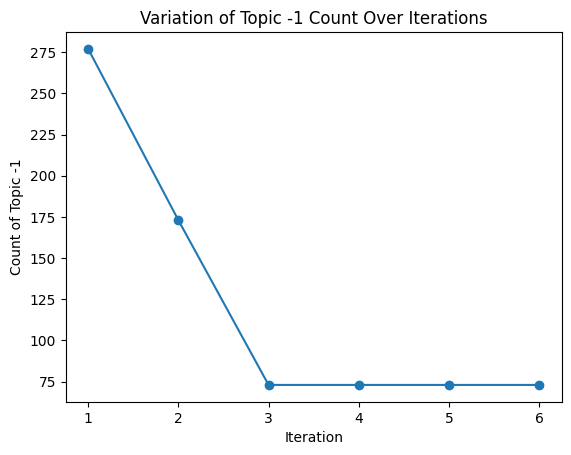

In [37]:
# Number of iterations
num_iterations = 6

# Initialize a list to store the counts of '-1' in each iteration
cluster_counts = []

for iteration in range(1, num_iterations + 1):
    # Load data from the file
    file_path = f'outliers_iteration_{iteration}.csv'
    data = pd.read_csv(file_path)

    # Count occurrences of '-1' in the 'Cluster' column
    count_minus_1 = data['Topic'].eq(-1).sum()

    # Store the count in the list
    cluster_counts.append(count_minus_1)

# Plot the variation of counts over iterations
plt.plot(range(1, num_iterations + 1), cluster_counts, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Count of Topic -1')
plt.title('Variation of Topic -1 Count Over Iterations')
plt.show()


this is just to check the exact amount of abstracts for Topic -1, at the desired iteration:

In [53]:
# Replace 'outliers_iteration_n.csv' with the n-iteration you want to check
file_path = 'outliers_iteration_1.csv'

# Replace 'your_column' with the actual column name
column_name = 'Topic'

# Replace 'your_value' with the specific value you want to count
specific_value = -1

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Count the occurrences of the specific value in the specified column
count_specific_value = (data[column_name] == specific_value).sum()

# Print the result
print(f'The number of occurrences of "{specific_value}" in column "{column_name}" is: {count_specific_value}')


The number of occurrences of "-1" in column "Topic" is: 73


*   Convergence: It's possible that the clustering process is converging towards a stable solution, as the model iteratively updates cluster assignments, it may have reached a point where further iterations have no impact on diminshig the number of outliers.

If the decrease in outliers continues across iterations, it may indicate that the initial clustering had some noise or misclassifications, and the subsequent iterations are correcting or removing these cases. We are not investigating this specific aspect here, but future works should follow this direction.



### Visualization

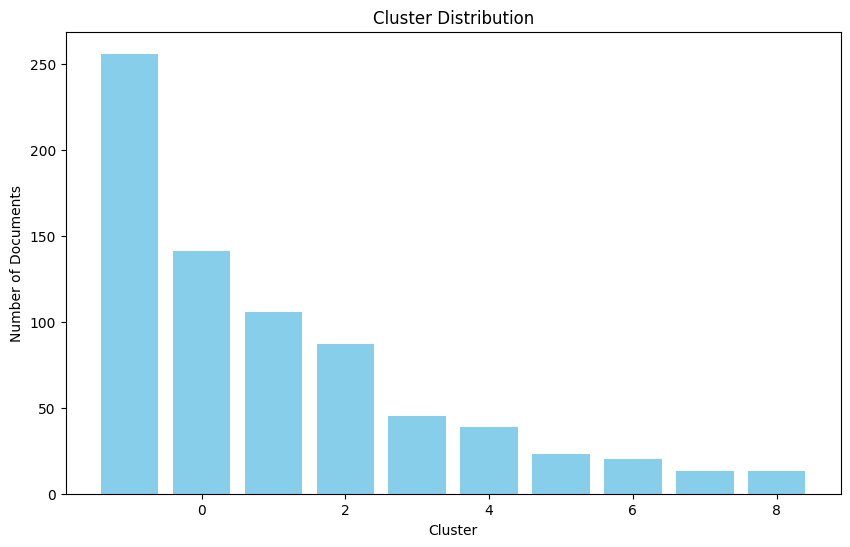

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Visualize Topic Distribution
plt.figure(figsize=(10, 6))
topic_distribution = Counter(outliers_topics)
plt.bar(topic_distribution.keys(), topic_distribution.values(), color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Documents')
plt.title('Cluster Distribution')
plt.show()


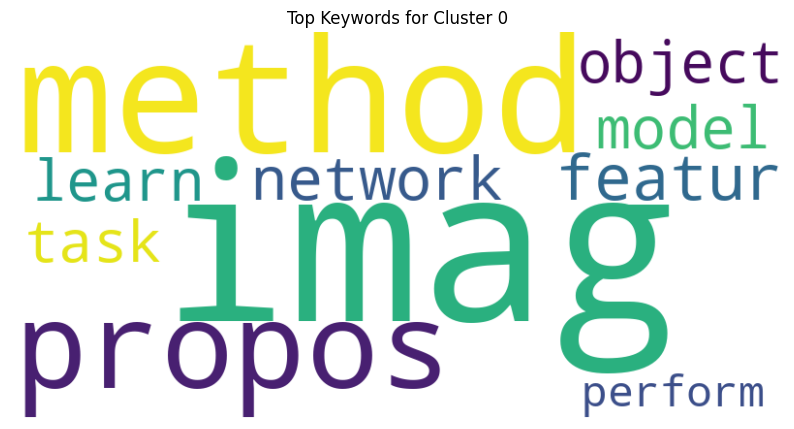

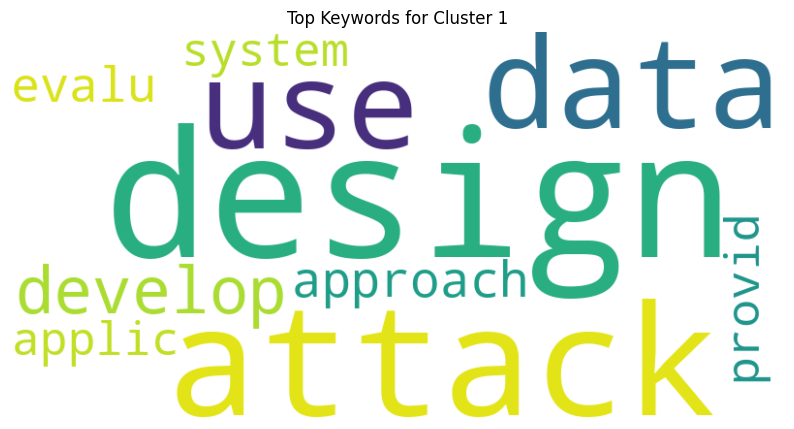

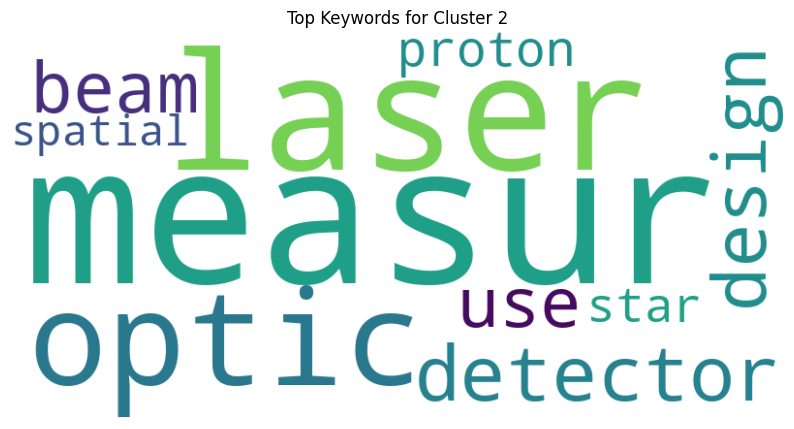

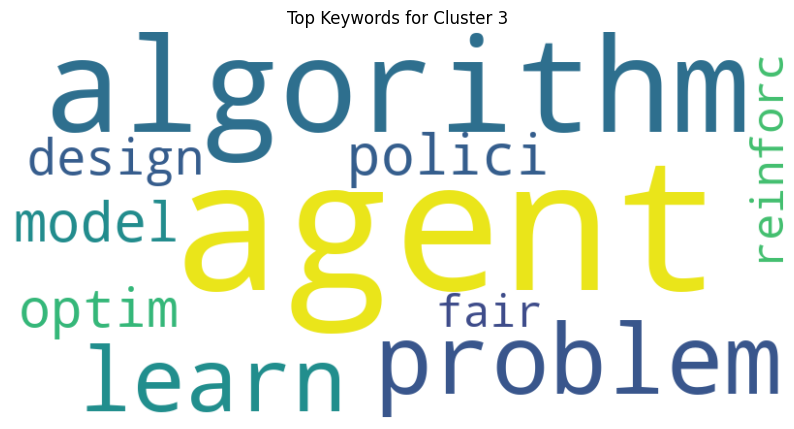

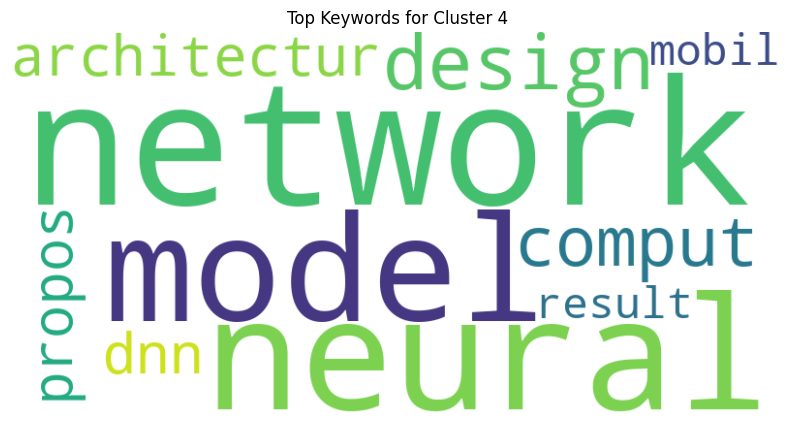

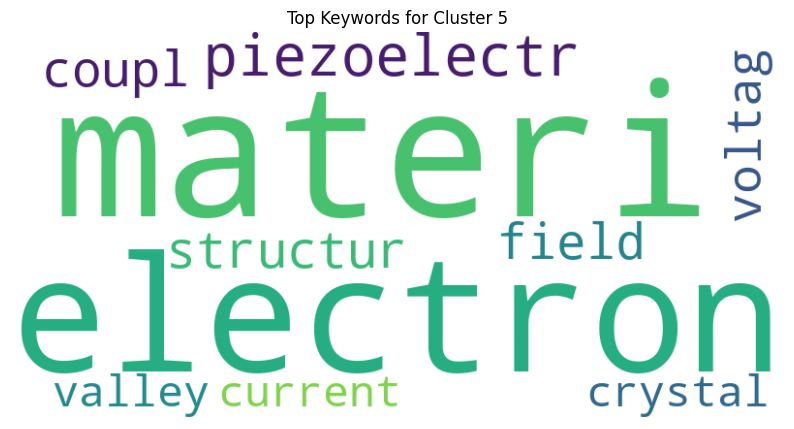

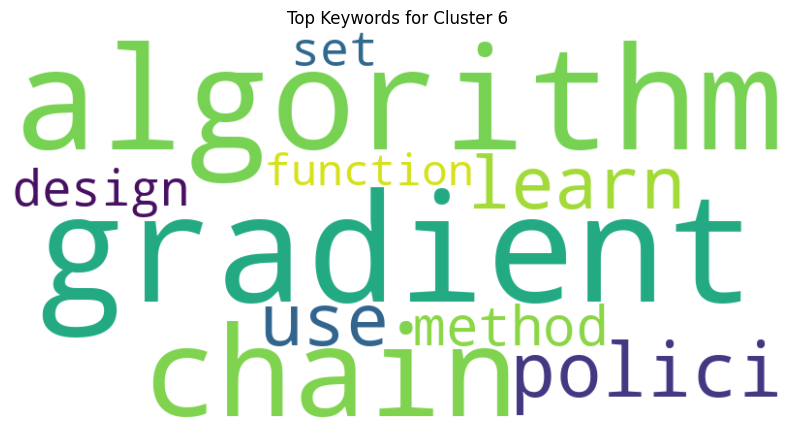

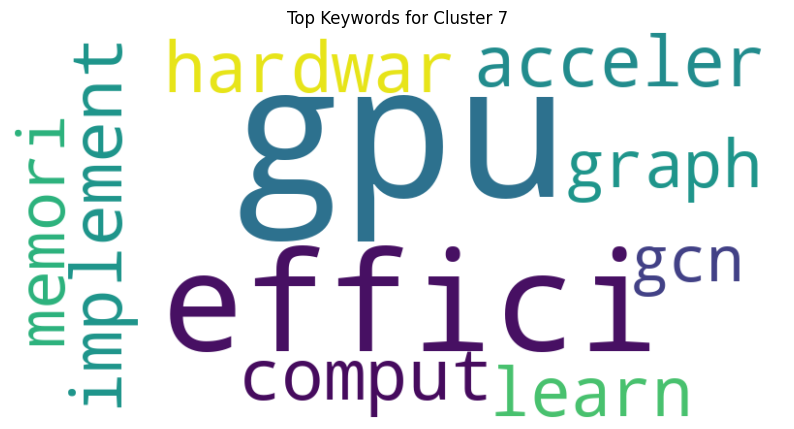

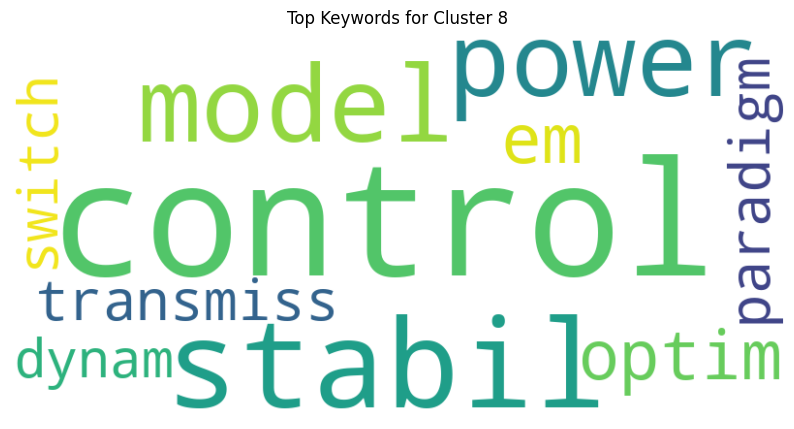

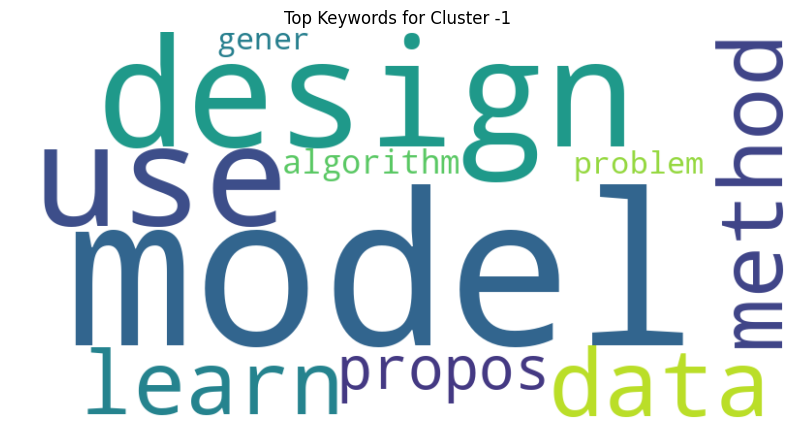

In [20]:
# Extract and visualize Top Keywords for each cluster
def visualize_top_keywords(top_keywords, cluster_num):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_keywords)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top Keywords for Cluster {cluster_num}')
    plt.show()

# Function to get top words for a cluster
def get_top_words_for_cluster(bertopic_model, cluster_num, top_n_words=15):
    top_words = bertopic_model.get_topic(cluster_num)[:top_n_words]
    return {word: weight for word, weight in top_words}

# Extract and visualize top 15 words for each cluster
unique_clusters = set(outliers_topics)
for cluster_num in unique_clusters:
    top_words_for_cluster = get_top_words_for_cluster(bertopic_outliers, cluster_num, top_n_words=15)
    visualize_top_keywords(top_words_for_cluster, cluster_num)


2. print topic distribution

In [ ]:
pip install matplotlib wordcloud

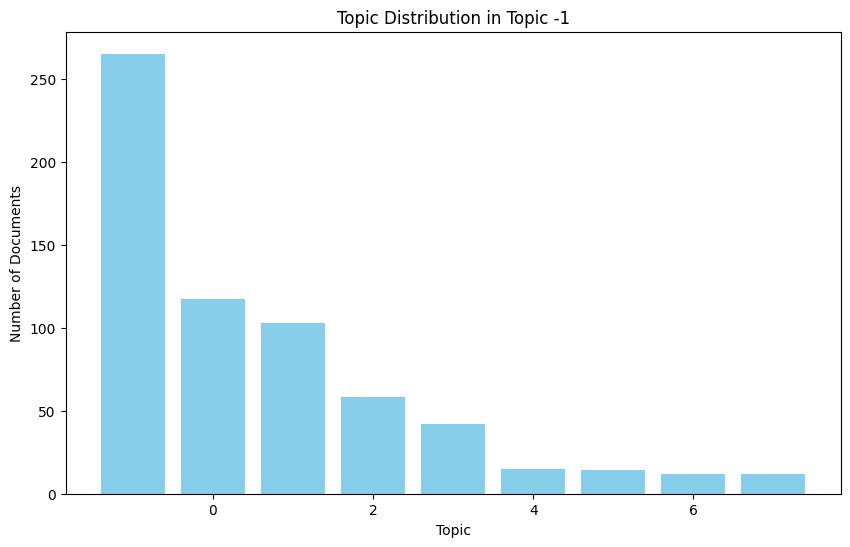


Top words for Topic -1: model, data, use, learn, propos, design, method, perform, gener, train

Top words for Topic 0: design, use, measur, optic, method, energi, beam, laser, high, propos

Top words for Topic 1: algorithm, optim, problem, model, design, learn, agent, polici, use, method

Top words for Topic 2: design, data, type, system, model, approach, vector, use, requir, refactor

Top words for Topic 3: network, neural, model, design, architectur, deep, learn, use, dataset, algorithm

Top words for Topic 4: attack, adversari, robust, trojan, detect, propos, defens, work, alert, certifi

Top words for Topic 5: visual, emot, scene, gener, object, use, human, ai, learn, method

Top words for Topic 6: outlier, point, cloud, robust, matrix, normal, registr, method, featur, cone

Top words for Topic 7: gpu, effici, comput, hardwar, learn, graph, gcn, memori, nvidia, grecx


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Visualize Topic Distribution
plt.figure(figsize=(10, 6))
topic_distribution = Counter(outliers_topics)
plt.bar(topic_distribution.keys(), topic_distribution.values(), color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution in Topic -1')
plt.show()

# Extract and visualize Top Keywords for each cluster
def visualize_top_keywords(top_keywords, cluster_num):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_keywords)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top Keywords for Cluster {cluster_num}')
    plt.show()

# Inspect words for each topic
for topic_id in bertopic_outliers.get_topics():
    words = [word for word, _ in bertopic_outliers.get_topic(topic_id)]
    print(f"\nTop words for Topic {topic_id}: {', '.join(words)}")


outliers are still numerous, but the provided classification shows enough space for finer-grane analyses

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming you have the document vectors for each document in each cluster
# Replace 'document_vectors' with the actual variable containing your vectors
cluster_document_vectors = {cluster: [] for cluster in set(outliers_topics)}

for i, cluster in enumerate(outliers_topics):
    cluster_document_vectors[cluster].append(outliers_vectors[i])

# Calculate cosine similarity within each cluster
cluster_similarities = {}
for cluster, vectors in cluster_document_vectors.items():
    if len(vectors) > 1:
        # Convert list of vectors to numpy array
        vectors_array = np.array(vectors)

        # Calculate cosine similarity matrix
        similarity_matrix = cosine_similarity(vectors_array, vectors_array)
        cluster_similarities[cluster] = similarity_matrix

# Print or analyze the similarities within each cluster
for cluster, similarity_matrix in cluster_similarities.items():
    print(f"Similarity Matrix for Cluster {cluster}:\n{similarity_matrix}")


This code calculates the cosine similarity between document vectors within each cluster, resulting in a similarity matrix for each cluster.

heatmap for similarity matrices:

### new clustering without common keywords in the outlier

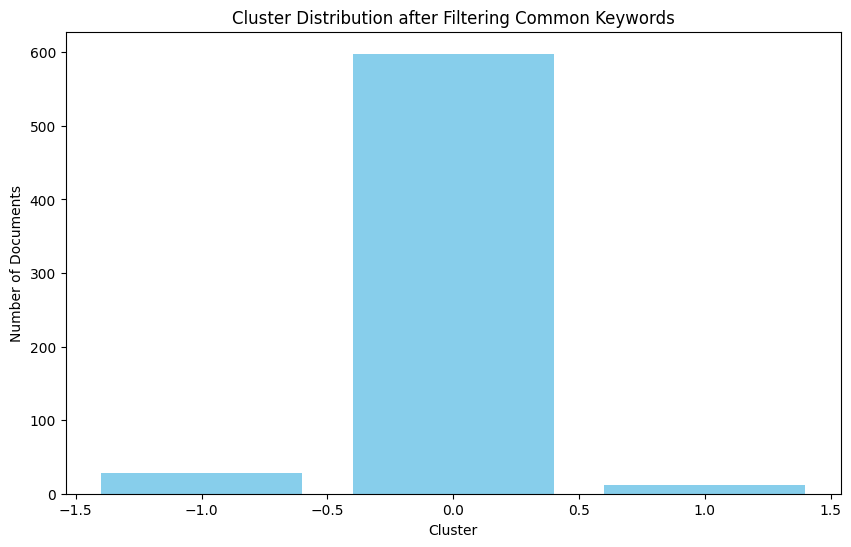

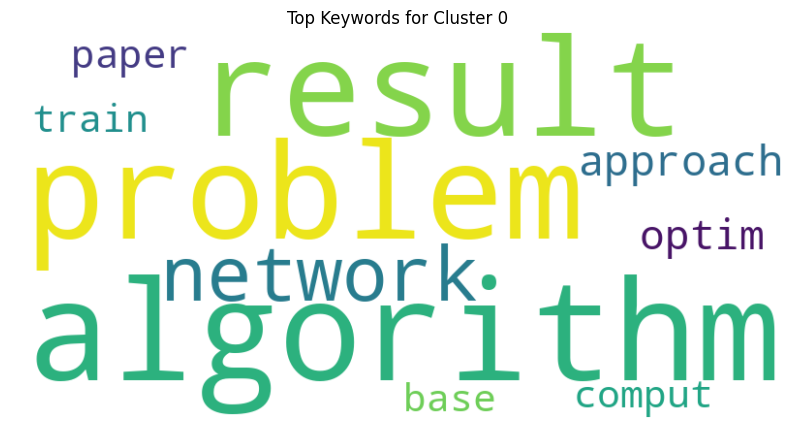

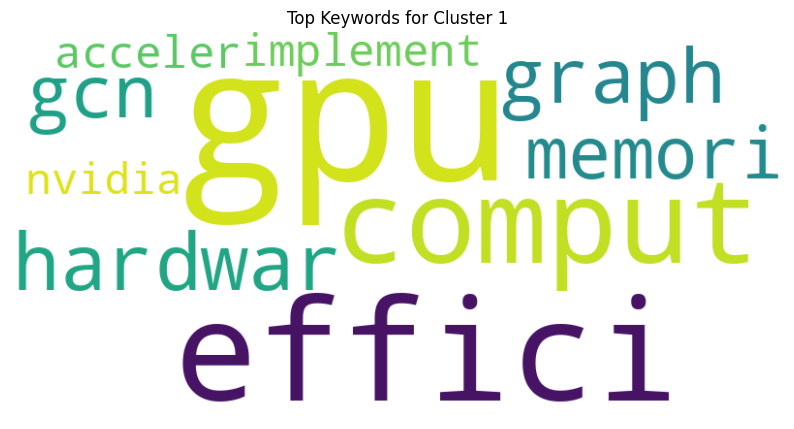

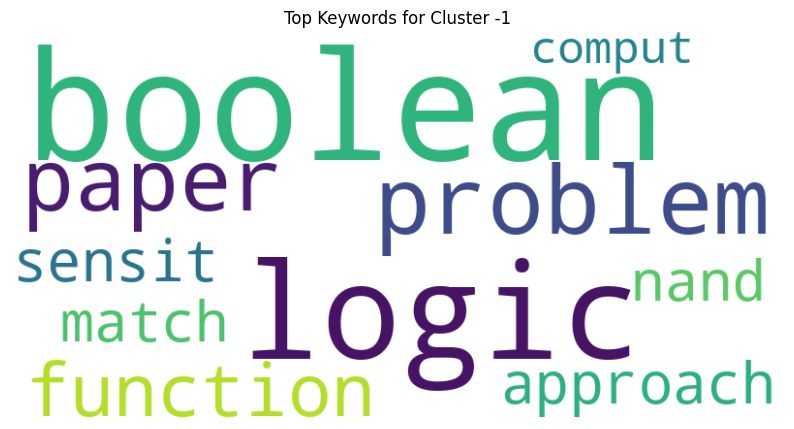

In [ ]:
import pandas as pd
from bertopic import BERTopic
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Load data
data = pd.read_csv('clustering_results.csv')  # Assuming this is the correct file name

# Select only outliers
topic_minus1_outliers = data[data['Topic'] == -1]

# Extract abstracts
outliers_abstracts = topic_minus1_outliers['Abstract'].tolist()

# Common top keywords across clusters
common_keywords = ["design", "model", "use", "data", "method", "propos", "gener", "perform", "learn"]

# Remove common keywords from abstracts
outliers_abstracts_filtered = [' '.join([word for word in abstract.split() if word.lower() not in common_keywords]) for abstract in outliers_abstracts]

# Apply clustering on filtered abstracts
bertopic_outliers_filtered = BERTopic()
outliers_topics_filtered, _ = bertopic_outliers_filtered.fit_transform(outliers_abstracts_filtered)

# Visualize Topic Distribution after filtering common keywords
plt.figure(figsize=(10, 6))
topic_distribution_filtered = Counter(outliers_topics_filtered)
plt.bar(topic_distribution_filtered.keys(), topic_distribution_filtered.values(), color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Documents')
plt.title('Cluster Distribution after Filtering Common Keywords')
plt.show()

# Extract and visualize Top Keywords for each cluster after filtering
unique_clusters_filtered = set(outliers_topics_filtered)
for cluster_num in unique_clusters_filtered:
    top_words_for_cluster = bertopic_outliers_filtered.get_topic(cluster_num)[:15]
    visualize_top_keywords(dict(top_words_for_cluster), cluster_num)

In [ ]:
for cluster_num in range(max(outliers_topics_filtered) + 1):
  top_words_for_cluster = bertopic_outliers_filtered.get_topic(cluster_num)[:15]
  words = [word for word, _ in top_words_for_cluster]
  print(f"\nTop words for cluster {cluster_num}: {', '.join(words)}")


Top words for cluster 0: algorithm, result, problem, network, approach, optim, paper, train, comput, base

Top words for cluster 1: gpu, effici, comput, hardwar, graph, gcn, memori, implement, acceler, nvidia


This code removes the common keywords from the abstracts before applying clustering. now we only have three clusters (2 + outlier). The impact of excluding those common keywords is straightforward: we reduced considerably the amount of topics, the outlier is smaller, and the themes are extremly polarized across the topics.